In [153]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import os
import pandas as pd

- Usando los datos de la clase para el caso de la recta $ y=3x+2 $ se genera un conjunto de datos de 15 puntos, con un error asociado de 0.2.

In [154]:
#Definimos los parámetros iniciales

a=3
b=2
sigma=0.2

In [155]:
#Generamos los puntos del modelo al que queremos llegar
x_i=np.random.uniform(0,2, 15)
y_i= 3*x_i +2

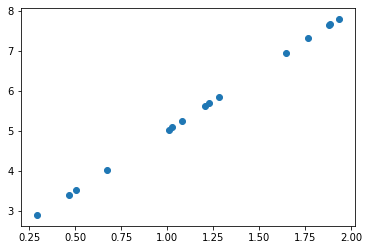

In [156]:
plt.scatter(x_i,y_i)

A partir de este punto se genera el conjunto de datos que tomaremos como los datos observados con el error asociado

In [157]:
err=(sigma/2)*np.random.randn(15)    

y_ob= y_i+err
x_ob=x_i


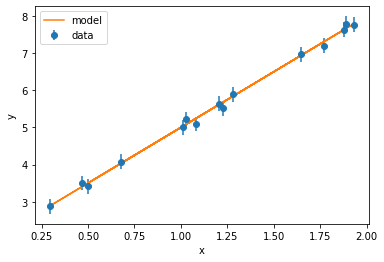

In [158]:
plt.errorbar(x_ob, y_ob, yerr=sigma,  xerr=None, fmt='o', label='data')  #Grafica de los datos observados con su barra de error
plot(x_i,y_i,'-', label='model')
plt.xlabel('x')
plt.ylabel('y')
legend()

In [159]:
f=open('recta_ob.txt', 'r')

In [160]:
n= np.array([x_ob, y_ob, err])
n=n.T


In [161]:
n

array([[ 1.20354292e+00,  5.63322546e+00,  2.25966973e-02],
       [ 4.67980623e-01,  3.50479374e+00,  1.00851872e-01],
       [ 1.00929298e+00,  5.00449260e+00, -2.33863291e-02],
       [ 2.94450536e-01,  2.86989007e+00, -1.34615374e-02],
       [ 1.28260301e+00,  5.89256190e+00,  4.47528539e-02],
       [ 1.93258693e+00,  7.77033625e+00, -2.74245313e-02],
       [ 1.88604117e+00,  7.79538678e+00,  1.37263267e-01],
       [ 1.64756998e+00,  6.97257825e+00,  2.98683245e-02],
       [ 1.08199167e+00,  5.09236163e+00, -1.53613385e-01],
       [ 1.02741604e+00,  5.22823202e+00,  1.45983893e-01],
       [ 1.87928350e+00,  7.63614819e+00, -1.70231940e-03],
       [ 5.02340021e-01,  3.41709329e+00, -8.99267737e-02],
       [ 1.76868211e+00,  7.20542340e+00, -1.00622931e-01],
       [ 6.75116326e-01,  4.07391213e+00,  4.85631469e-02],
       [ 1.22884256e+00,  5.51486452e+00, -1.71663147e-01]])

In [162]:
np.savetxt('recta_ob.txt', n, fmt="%f")
f=close()

In [163]:
f=open('recta_error.txt', 'r')

In [164]:
file=pd.read_csv('recta_error.txt',sep='\s+', header=None)

In [165]:
file

,0,1,2
0,1.572483,6.762863,0.045415
1,0.936663,4.802501,-0.007487
2,1.408869,6.280851,0.054244
3,1.980035,7.917107,-0.022998
4,1.975584,7.909142,-0.017609
5,0.549150,3.740753,0.093304
6,1.800707,7.576230,0.174108
7,1.742341,7.127373,-0.099651
8,1.155902,5.489933,0.022226
9,1.779364,7.223745,-0.114348


- Donde 0 es el eje x, 1 el eje y, 2 el error asociado 

Se definen algunas funciones

In [166]:
def line (x,m,b):
    return ((m*x)+b)

In [167]:

def chisq(theta, data):                 #Donde theta son los datos que se generan a aprtir del montecarlo
    x= data[0]
    y= data[1]
    yerr= data[2]
    #lo siguiente depende del modelo 
    
    model= line(x, theta[0], theta[1])
    chisq= (y-model)**2 / yerr**2
    return chisq.sum()

In [223]:
def comparacion (chisq_ini, chisq_new):
    if chisq_ini > chisq_new:
        chisq_ini= chisq_new
    elif 1/2*chisq_new < np.random.uniform(0,1):
        chisq_ini= chisq_new
    else: 
        chisq_ini= chisq_ini
    return chisq_ini

In [224]:
def store(a_ini, b_ini, a_new, b_new, chisqr_ini, chisq_store):
    
    if chisq_store == chisqr_ini:
        a_ini=a_ini
        b_ini=b_ini
    
    else:
        a_ini=a_new
        b_ini=b_new
        
    return (a_ini, b_ini, chisq_store)

In [225]:
def montecarlo(a_ini, b_ini, data, s2, n):
    
    chisqr_stor=np.zeros(n)
    a=np.zeros(n)
    b=np.zeros(n)

    for i in range(n):
    
        a[i]=a_ini
        b[i]=b_ini
    
        a_new =s2* np.random.randn()+a_ini
        b_new =s2* np.random.randn()+ b_ini   #Se generan los nuevos pares de parámetros
    
        chisqr_ini=chisq([a_ini,b_ini], data)
        chisqr_new=chisq([a_new,b_new], data)
    
        chisqr_stor[i]= chisqr_ini
    
        chisq_comp= comparacion(chisqr_ini, chisqr_new)
        
        if chisq_comp == chisqr_ini:
            a_ini=a_ini
            b_ini=b_ini
            
        else:
            a_ini=a_new
            b_ini=b_new
    
    
    return a, b, chisqr_stor
    
    


        

- Se tiene que generar el dato inicial que sera un par ordenado (a,b),
- Sabemos de nuestros datos que la recta tiene pendiente positiva (a > 0) y ya que mientras mas grande sea la pendiente màs inclinada es la recta nos limitaremos a un intervalo de (0,20) y que su intersección se encuentra en un intervalo que podemos ver entre (-1 y 5).

Así nuestro espacio de parametros será [(0,20), (-1,5)]



In [170]:
a_ini=np.random.uniform(0,20)
b_ini=np.random.uniform(-1,5)

In [171]:
a_ini, b_ini

(15.112711700446535, 2.459903188499469)

In [172]:
chisqr_ini=chisq([a_ini,b_ini], file)
chisqr_ini

7133557.942499484

## Primer intento a mano
Ahora se genera el siguiente punto que se encuentre dentro de la vecindad del primero (< 0.1)

In [21]:
a_new=a_ini+ np.random.uniform(0,0.1)
b_new = b_ini + np.random.uniform(0,0.1)
a_new, b_new

(19.047190545340058, 0.8148111721492118)

In [22]:
chisqr_new=chisq([a_new,b_new], file)
chisqr_new

10448854.175261365

In [23]:
#Comparación
chisq_store= comparacion(chisqr_ini, chisqr_new)
chisq_store


10382968.01114565

In [219]:
a=np.random.random(100)

In [220]:
a

array([0.62035357, 0.24364528, 0.37926942, 0.63857802, 0.97139271,
       0.70391921, 0.11889218, 0.3880911 , 0.30619946, 0.98681514,
       0.37959856, 0.56395375, 0.41419169, 0.12945475, 0.78973229,
       0.21875372, 0.99926987, 0.54728927, 0.94270744, 0.43356708,
       0.70281321, 0.7787847 , 0.60475201, 0.02563209, 0.35956019,
       0.55489806, 0.8132096 , 0.78870656, 0.51008886, 0.44309313,
       0.18566039, 0.90697856, 0.46766034, 0.87209611, 0.37761328,
       0.08505214, 0.98458276, 0.97106835, 0.49031493, 0.32379016,
       0.01462284, 0.04636329, 0.10350397, 0.46020363, 0.07546564,
       0.07098472, 0.37831338, 0.93419294, 0.60011894, 0.0061327 ,
       0.19841075, 0.02355484, 0.42285471, 0.80170156, 0.19564969,
       0.89788852, 0.64897042, 0.91537656, 0.37331434, 0.82052847,
       0.40556406, 0.64365039, 0.297093  , 0.8285564 , 0.33538661,
       0.27524209, 0.28647653, 0.92188341, 0.02232753, 0.18480457,
       0.1927994 , 0.10590766, 0.10501673, 0.47907078, 0.73204

In [226]:
a_ini, b_ini, chisqr_ini

(15.112711700446535, 2.459903188499469, 7133557.942499484)

In [338]:
param=montecarlo(a_ini, b_ini, file, 0.1, 1000)

In [339]:
param

(array([4.8660726 , 4.8660726 , 4.74099789, 4.74099789, 4.61588133,
        4.54307611, 4.54307611, 4.69244982, 4.69244982, 4.5656977 ,
        4.5656977 , 4.5656977 , 4.47534781, 4.47534781, 4.47534781,
        4.43241523, 4.35137799, 4.26557438, 4.26557438, 4.34481701,
        4.34481701, 4.34481701, 4.39832726, 4.3811608 , 4.31505293,
        4.31505293, 4.31505293, 4.16061865, 4.16061865, 4.16061865,
        4.11647853, 4.11647853, 4.07700175, 4.07700175, 4.07700175,
        4.1400022 , 4.10412863, 4.04264461, 3.98956101, 4.04671017,
        4.04671017, 3.92420837, 3.92420837, 3.92420837, 3.92420837,
        3.92420837, 3.84292618, 3.75685587, 3.75685587, 3.75685587,
        3.75685587, 3.75685587, 3.71898899, 3.71898899, 3.59893066,
        3.59893066, 3.59893066, 3.59893066, 3.59893066, 3.59893066,
        3.59893066, 3.59893066, 3.59893066, 3.59893066, 3.59893066,
        3.59893066, 3.59893066, 3.59893066, 3.59893066, 3.59893066,
        3.6203607 , 3.6203607 , 3.6203607 , 3.62

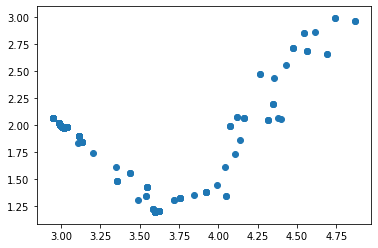

In [340]:
a=param[0]
b=param[1]
plt.scatter(a,b)


(array([883.,  17.,   1.,   0.,   5.,   4.,  36.,   0.,   7.,   1.,   6.,
          6.,   7.,   2.,   8.,   5.,   5.,   1.,   4.,   2.]),
 array([2.95108299, 3.04683247, 3.14258195, 3.23833143, 3.33408091,
        3.42983039, 3.52557988, 3.62132936, 3.71707884, 3.81282832,
        3.9085778 , 4.00432728, 4.10007676, 4.19582624, 4.29157572,
        4.3873252 , 4.48307468, 4.57882416, 4.67457364, 4.77032312,
        4.8660726 ]),
 <a list of 20 Patch objects>)

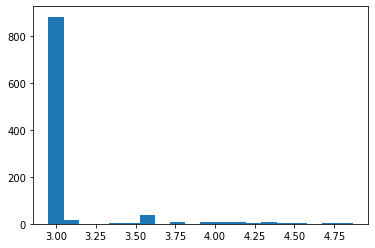

In [341]:
plt.hist(a,20 )

(array([ 29.,  13.,  11.,   4.,   5.,   0.,   2.,  18., 685., 211.,   0.,
          3.,   0.,   1.,   2.,   1.,   8.,   0.,   3.,   4.]),
 array([1.19029208, 1.2805608 , 1.37082952, 1.46109824, 1.55136695,
        1.64163567, 1.73190439, 1.82217311, 1.91244182, 2.00271054,
        2.09297926, 2.18324797, 2.27351669, 2.36378541, 2.45405413,
        2.54432284, 2.63459156, 2.72486028, 2.815129  , 2.90539771,
        2.99566643]),
 <a list of 20 Patch objects>)

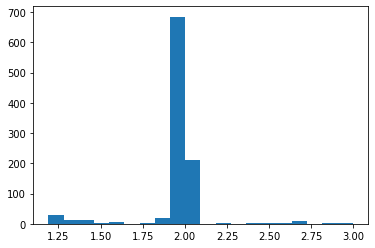

In [342]:
plt.hist(b,20 )

In [390]:
a_ini=np.random.uniform(2.95,3.005)
b_ini=np.random.uniform(1.95,2.04)

a_ini, b_ini

(2.9987508953376594, 2.0334288554472137)

In [406]:
param=montecarlo(a_ini, b_ini, file, 0.001, 2000)

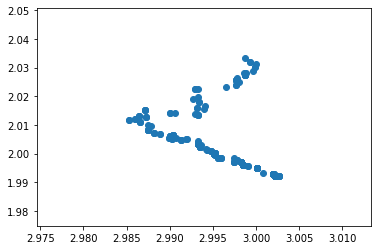

In [407]:
a=param[0]
b=param[1]
plt.scatter(a,b)

(array([   4.,    6.,   14.,    3.,    2.,   15.,    5.,    2.,    4.,
          24.,    8.,   17.,    4.,    4.,   12.,   33.,    6.,   16.,
           0., 1821.]),
 array([2.98528555, 2.98615456, 2.98702356, 2.98789257, 2.98876158,
        2.98963058, 2.99049959, 2.9913686 , 2.9922376 , 2.99310661,
        2.99397561, 2.99484462, 2.99571363, 2.99658263, 2.99745164,
        2.99832065, 2.99918965, 3.00005866, 3.00092766, 3.00179667,
        3.00266568]),
 <a list of 20 Patch objects>)

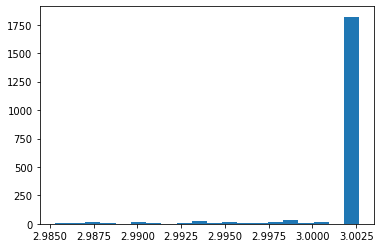

In [408]:
plt.hist(a,20 )

(array([1822.,   31.,   15.,   21.,   12.,    9.,   19.,   10.,    2.,
           7.,   13.,    8.,    2.,    2.,    3.,    4.,    5.,    9.,
           3.,    3.]),
 array([1.99202005, 1.99409049, 1.99616093, 1.99823137, 2.00030181,
        2.00237225, 2.00444269, 2.00651313, 2.00858357, 2.01065401,
        2.01272445, 2.01479489, 2.01686533, 2.01893577, 2.02100621,
        2.02307666, 2.0251471 , 2.02721754, 2.02928798, 2.03135842,
        2.03342886]),
 <a list of 20 Patch objects>)

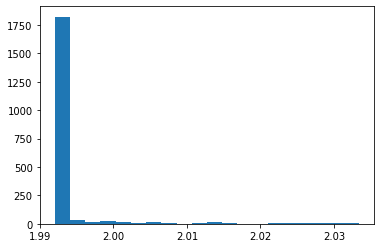

In [409]:
plt.hist(b,20 )